<a href="https://colab.research.google.com/github/PrinceRaj1161/KrishUdemyLearning/blob/main/MiniProject2/MultipleLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/economic_index.csv")
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [3]:
# Step 1: Removing the unnessary columns
df.drop(columns=['Unnamed: 0','year','month'], axis=1, inplace=True)

In [4]:
# Step 2: Checking null values
df.isnull().sum()

,0
interest_rate,0
unemployment_rate,0
index_price,0


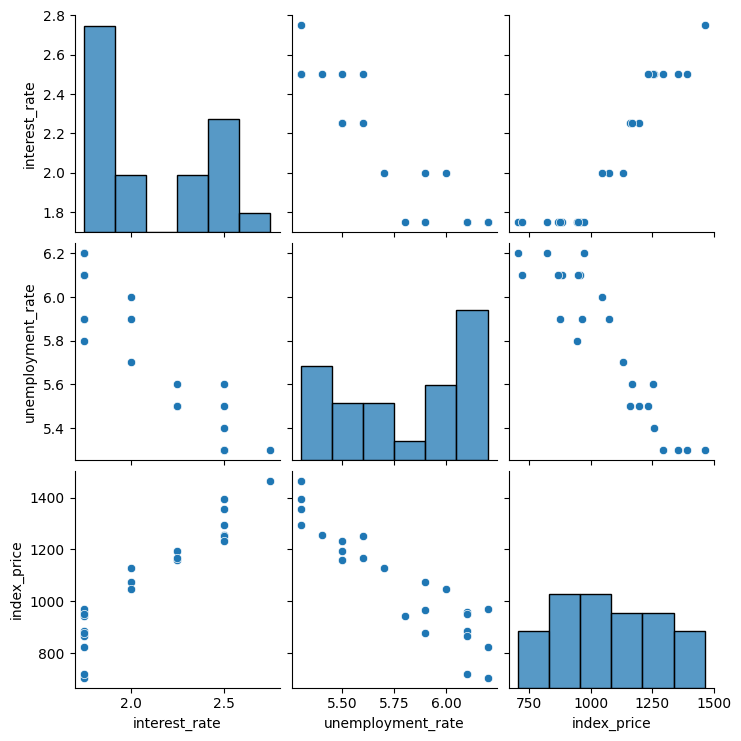

In [5]:
# Step 3: Viusalization

import seaborn as sns
sns.pairplot(df)

In [6]:
# From the graph, we can see Unemployment_rate and interest_rate , there's a negative slope

df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


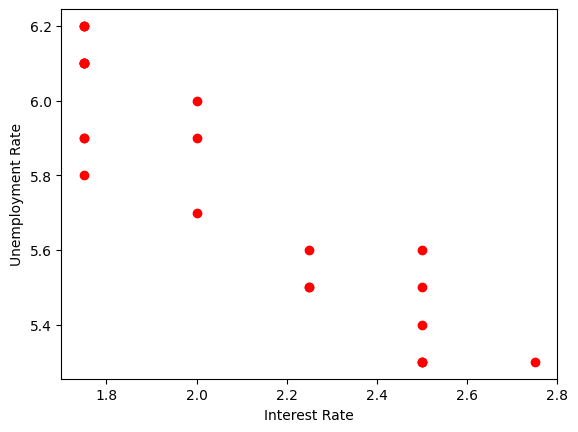

In [7]:
plt.scatter(df['interest_rate'], df['unemployment_rate'], c="red")
plt.xlabel("Interest Rate")
plt.ylabel("Unemployment Rate")
plt.show()

In [8]:
# Step 4: Getting dependent and Independent Variable

X = df.iloc[:,:-1]
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [9]:
Y = df['index_price']
Y.head()

,index_price
0,1464
1,1394
2,1357
3,1293
4,1256


In [10]:
# Step 5: Train Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((18, 2), (6, 2), (18,), (6,))

<Axes: xlabel='interest_rate', ylabel='index_price'>

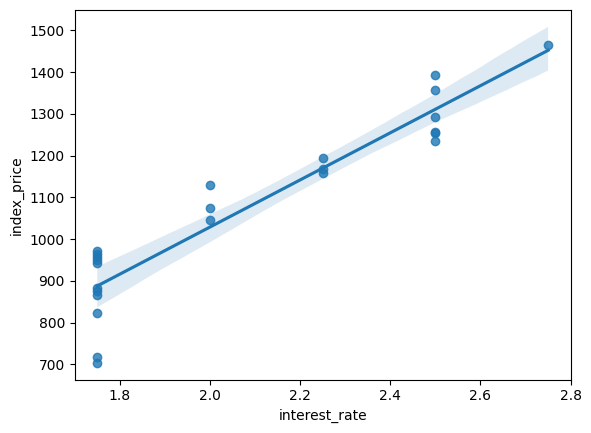

In [11]:
# Using regplot

sns.regplot(x=df['interest_rate'], y=df['index_price'])

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

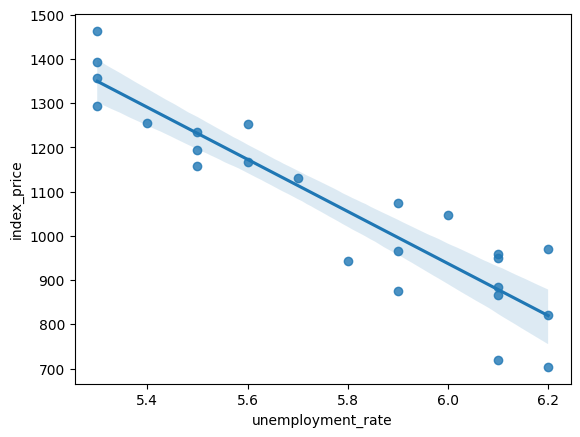

In [12]:
# Using regplot

sns.regplot(x=df['unemployment_rate'], y=df['index_price'])

In [13]:
# Step 6: Standrad Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

In [14]:
X_train[0:5]

array([[ 1.43727773, -0.79075654],
       [ 0.69810633, -1.12177091],
       [-0.78023648,  0.20228656],
       [-0.78023648,  1.19532966],
       [ 1.43727773, -1.12177091]])

In [15]:
X_test = scaler.transform(X_test)
X_test

array([[-0.04106508,  0.20228656],
       [ 0.69810633, -1.12177091],
       [ 1.43727773, -1.45278527],
       [ 1.43727773, -1.78379964],
       [ 1.43727773, -1.78379964],
       [-0.78023648,  0.86431529]])

In [16]:
# Step 7: Training a model

from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, Y_train)

LinearRegression()

In [17]:
# Step 8: Evaluation

from sklearn.model_selection import cross_val_score

score = cross_val_score(model, X_train, Y_train, scoring="neg_mean_squared_error", cv=5)

print(score)

[ -7492.07270773  -3044.00892626 -15860.05542481  -9311.72004877
  -2545.7732366 ]


In [19]:
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
adjusted_r2 = 1 - (1 - r2) * (len(Y_test) - 1) / (len(Y_test) - X_test.shape[1] - 1)

In [20]:
print(mse)
print(mae)
print(r2)
print(adjusted_r2)

4109.713499801481
58.635456992220576
0.7849959149967618
0.6416598583279363


Text(0, 0.5, 'Y Pred')

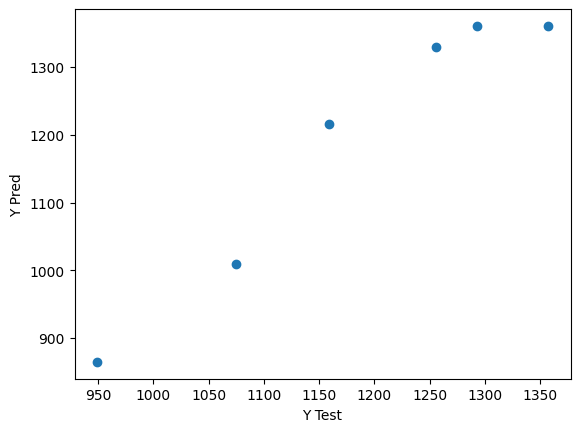

In [21]:
# Step 9: Assumptions and Residual

Y_pred = model.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Y Test")
plt.ylabel("Y Pred")

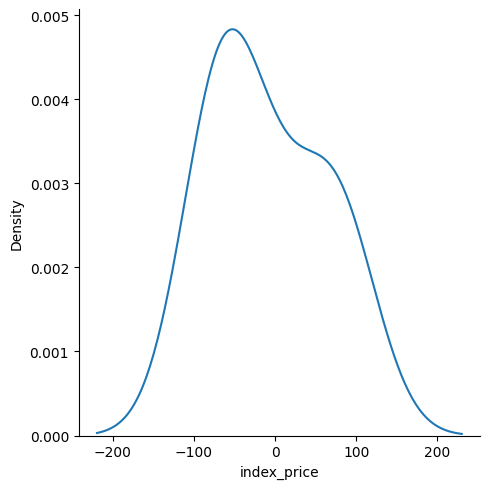

In [24]:
residuals = Y_test - Y_pred

sns.displot(residuals, kind="kde")

So model is little bit wrong

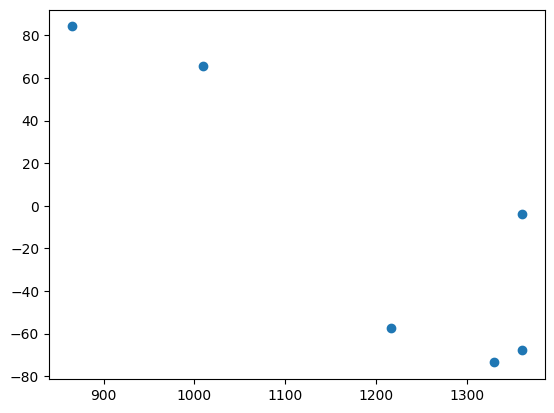

In [25]:
## scatter plot with respect to prediction and residuals
plt.scatter(y_pred,residuals)

# OLS

In [26]:
## OLS Linear Regression
import statsmodels.api as sm
model_OLS=sm.OLS(Y_train,X_train).fit()

In [28]:
model_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.036
Model:                            OLS   Adj. R-squared (uncentered):             -0.084
Method:                 Least Squares   F-statistic:                             0.2995
Date:                Mon, 10 Nov 2025   Prob (F-statistic):                       0.745
Time:                        10:48:35   Log-Likelihood:                         -150.50
No. Observations:                  18   AIC:                                      305.0
Df Residuals:                      16   BIC:                                      306.8
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           111.3221    600.719      0.185      0.855   -1162.146    1384.790
x2           -94.0214    600.719     -0.157      0.878   -1367.490    1179.447
==============================================================================
Omnibus:                        0.852   Durbin-Watson:                   0.009
Prob(Omnibus):                  0.653   Jarque-Bera (JB):                0.247
Skew:                          -0.286   Prob(JB):                        0.884
Kurtosis:                       3.045   Cond. No.                         4.42
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
print(model.coef_)

[111.32213751 -94.02142439]
